# Quantitative Biology and Biophysics (AS.020.674/618)	Spring 2022
# Gordus Lab 
# April 15, 2022

#  Enzyme Kinetics

The goal of this lab is to practice fitting kinetic models to experimental data. Please refer to the Word document associated with this lab for details on the model.

## Libraries you will need

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from sklearn.utils import resample as bootstrap

## Question 2B:
Create plots of the concentration of A ([A]) vs. time (0 ≤ t ≤ 10) for these reactions in one figure, using values of the starting concentration ([A]0) and t1/2 equal to one. Be sure to label the axes and add a legend that identifies the individual plots.

In [2]:
# Example: Zero-order reaction

# define half life value
t_half = 1;

# define starting concentration value
A0 = 1;

# create vector containing discrete time values
t = np.linspace(0, 10, 21)

# zero-order reaction
# calculate rate constant from half-life
k_zero = A0 / (2 * t_half)
# calculate concentration of A at time t, zero-order reaction
A_zero = A0 - k_zero * t
# correct for the fact that the concentration cannot drop below 0
A_zero[A_zero < 0] = 0

## Student Input Cell

Text(0, 0.5, '[A]')

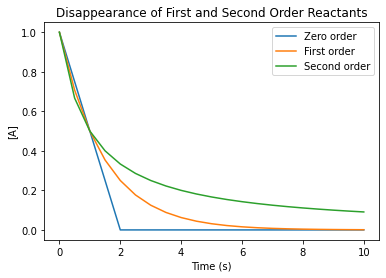

In [3]:
# Perform the same calculations for first-order and second order reactions,
# and plot on same graph.

# First order
k_first = np.log(2) / t_half
A_first = A0 * np.exp(-k_first * t)

# Second order
k_second = 1 / (t_half * A0)
A_second = A0 / (1 + A0 * k_second * t)

plt.plot(t, A_zero)
plt.plot(t, A_first)
plt.plot(t, A_second)

plt.legend(['Zero order', 'First order', 'Second order'])
plt.title('Disappearance of First and Second Order Reactants')
plt.xlabel('Time (s)')
plt.ylabel('[A]')

In [4]:
# For question 2C
frac = [0.5, 1, 2, 10]

for i in frac:
    print(str(i), '* half-life')
    idx = np.where(t == i*t_half)
    print(float(A_zero[idx]))
    print(float(A_first[idx]))
    print(float(A_second[idx]))
    print('\n')

0.5 * half-life
0.75
0.7071067811865476
0.6666666666666666


1 * half-life
0.5
0.5
0.5


2 * half-life
0.0
0.25
0.3333333333333333


10 * half-life
0.0
0.0009765625
0.09090909090909091




## Question 3a:
The file ‘A_vs_t.txt’ contains simulated data from a kinetic measurement. Column 1 contains time values, column 2 contains measured signal values. The measured signal is proportional to the concentration of A. 

The code below fits the data to a zero-order kinetic model and plots the data with the fit as well as the residuals.

**Do the following**

Fit the data to the first- and second-order models described in Q2. Use the code provided and adjust it as necessary to do the first- and second-order model fitting.

**Below is example code for a zero-order reaction**

k =  0.002574875126243451
Sum of residuals =  0.07338302185223484


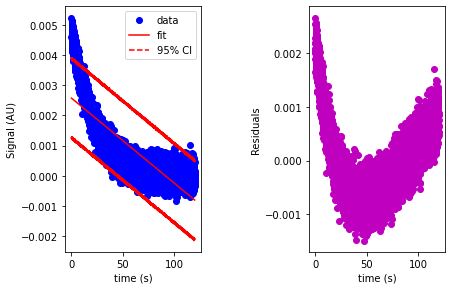

In [5]:
data = np.loadtxt('A_vs_t.txt')

# We're going to copy the time and signal values into separate variables
# for convenience
# copy time values (column 1)
t = data[:,0]
# copy signal values (column 2)
A = data[:,1]

# set start points (we are using educated guesses here)
param_guess = [0.1, 0.005]

def zero_order(t,k,A0):
  A_zero = A0 - k * t
  return A_zero

# Predict !
params, pcov = curve_fit(zero_order,t,A,p0=[0.1, 0.005])

A_pred = zero_order(t,params[0],params[1])

# To calculate the 95% confidence intervals, we will assume
# the error is Gaussian distributed.
# NOTE: This part takes a few seconds to run.

noise = np.std(A - A_pred)
predictions = np.array([np.random.normal(A_pred,noise) for j in range(10_000)])

u,l = np.quantile(predictions, [0.025, 0.975], axis = 0)

# Plot results
fig,ax = plt.subplots(1,2)

fig.tight_layout() 
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.8, hspace=None)

ax[0].plot(t,A, 'bo', label = 'data')
ax[0].plot(t,A_pred, 'r-',label = 'fit')
ax[0].plot(t, u, 'r--', label = '95% CI')
ax[0].plot(t, l, 'r--')
ax[0].set_xlabel('time (s)')
ax[0].set_ylabel('Signal (AU)')
ax[0].legend()
         
ax[1].plot(t,A - A_pred, 'mo', label = 'fit')
ax[1].set_xlabel('time (s)')
ax[1].set_ylabel('Residuals')

print('k = ', params[1])
print('Sum of residuals = ', np.sqrt(((A - A_pred)**2).sum()))

## Student Input Cell

k =  0.004779487149931113
Sum of residuals =  0.026455096499963426


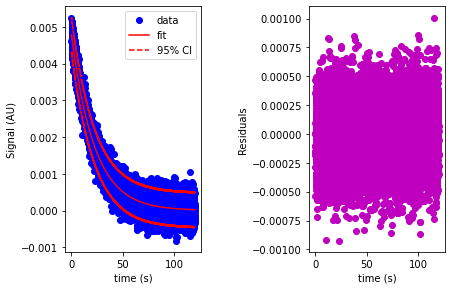

In [6]:
def first_order(t,k,A0):
  A_first = A0 * np.exp(-k * t)
  return A_first

# Predict !
params, pcov = curve_fit(first_order,t,A,p0=[0.1, 0.005])

A_pred = first_order(t,params[0],params[1])

# To calculate the 95% confidence intervals, we will assume
# the error is Gaussian distributed.
# NOTE: This part takes a few seconds to run.

noise = np.std(A - A_pred)
predictions = np.array([np.random.normal(A_pred,noise) for j in range(10_000)])

u,l = np.quantile(predictions, [0.025, 0.975], axis = 0)

# Plot results
fig,ax = plt.subplots(1,2)

fig.tight_layout() 
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.8, hspace=None)

ax[0].plot(t,A, 'bo', label = 'data')
ax[0].plot(t,A_pred, 'r-',label = 'fit')
ax[0].plot(t, u, 'r--', label = '95% CI')
ax[0].plot(t, l, 'r--')
ax[0].set_xlabel('time (s)')
ax[0].set_ylabel('Signal (AU)')
ax[0].legend()
         
ax[1].plot(t,A - A_pred, 'mo', label = 'fit')
ax[1].set_xlabel('time (s)')
ax[1].set_ylabel('Residuals')

print('k = ', params[1])
print('Sum of residuals = ', np.sqrt(((A - A_pred)**2).sum()))

k =  0.005925843551277846
Sum of residuals =  0.045401339806970496


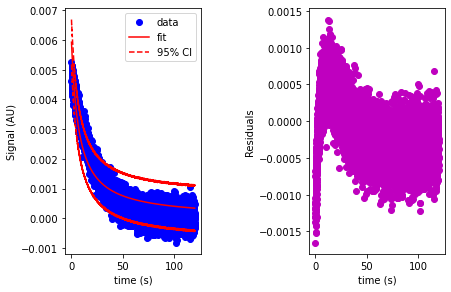

In [7]:
def second_order(t,k,A0):
  A_zero = A0 / (1 + A0 * k * t)
  return A_zero

# Predict !
params, pcov = curve_fit(second_order,t,A,p0=[0.1, 0.005])

A_pred = second_order(t,params[0],params[1])

# To calculate the 95% confidence intervals, we will assume
# the error is Gaussian distributed.
# NOTE: This part takes a few seconds to run.

noise = np.std(A - A_pred)
predictions = np.array([np.random.normal(A_pred,noise) for j in range(10_000)])

u,l = np.quantile(predictions, [0.025, 0.975], axis = 0)

# Plot results
fig,ax = plt.subplots(1,2)

fig.tight_layout() 
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.8, hspace=None)

ax[0].plot(t,A, 'bo', label = 'data')
ax[0].plot(t,A_pred, 'r-',label = 'fit')
ax[0].plot(t, u, 'r--', label = '95% CI')
ax[0].plot(t, l, 'r--')
ax[0].set_xlabel('time (s)')
ax[0].set_ylabel('Signal (AU)')
ax[0].legend()
         
ax[1].plot(t,A - A_pred, 'mo', label = 'fit')
ax[1].set_xlabel('time (s)')
ax[1].set_ylabel('Residuals')

print('k = ', params[1])
print('Sum of residuals = ', np.sqrt(((A - A_pred)**2).sum()))